In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
# Tras la evaluación de los usuarios, evaluamos el modelo del KNN, 

# TODOS LOS CORREOS ELECTRONICOS SE HAN ENCRIPTADO PARA PROTEGER LA INFORMACIÓN DE LOS USUARIOS

In [ ]:
predicciones = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Respuestas/Respuesta_viviendas.csv', sep=";")

In [ ]:
predicciones['correo_electronico'] = predicciones['correo_electronico'].apply(encrypt_email)


In [16]:
predicciones.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización'],
      dtype='object')

In [17]:
predicciones['num_inmueble'] = predicciones.groupby('correo_electronico').cumcount() + 1
predicciones['num_inmueble'] = predicciones['num_inmueble'].apply(lambda x: f"Evaluación de viviendas [Vivienda {x}]")

In [ ]:
respuestas = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Respuestas/Evaluación de viviendas (Respuestas) - Respuestas de formulario 1_csv.csv')


In [23]:
respuestas.rename(columns={'9': 'fecha_respuesta'}, inplace = True)

In [37]:
# Preparamos el dataset de respuestas canviando las columnas a filas 

respuestas_melted = respuestas.melt(id_vars=['Dirección de correo electrónico', 'fecha_respuesta'], var_name='Inmueble', value_name='Valoración')
respuestas_melted

,Dirección de correo electrónico,fecha_respuesta,Inmueble,Valoración
0,gAAAAABnu64p-phaL_LbAYCdpMIoabQ4oQubJ0-o5gZ0C0...,6/2/2025 20:47:51,Evaluación de viviendas [Vivienda 1],4
1,gAAAAABnu64pvsbTi-yk58OOfirYoYJvXwtvkWxtyXrB2D...,6/2/2025 21:51:05,Evaluación de viviendas [Vivienda 1],10
2,gAAAAABnu64pgGv4FVs71SjwzBoAX9_6mssvNocI6_eFOA...,8/2/2025 11:32:11,Evaluación de viviendas [Vivienda 1],1
3,gAAAAABnu64pCtxBgefTwgu-v7wP2LdBleGEghHv1YbjhW...,9/2/2025 16:08:08,Evaluación de viviendas [Vivienda 1],10
4,gAAAAABnu64pQWWaJ7jk2mXidEmsWumXe9R-6grO3Uh2gQ...,9/2/2025 16:21:05,Evaluación de viviendas [Vivienda 1],7
...,...,...,...,...
195,gAAAAABnu64pc-90lyEfUSKXZaBHKqDgCW-qxm5fsgijjD...,16/2/2025 17:12:38,Evaluación de viviendas [Vivienda 10],8
196,gAAAAABnu64pOSr4CYPu99htBLixV16vO6jnVKGHn2o0ng...,16/2/2025 17:14:19,Evaluación de viviendas [Vivienda 10],3
197,gAAAAABnu64pKsEhBscYKAzmqdcod3aDXkkibPK80-LotX...,16/2/2025 17:18:10,Evaluación de viviendas [Vivienda 10],3
198,gAAAAABnu64p4mS5jEhD5MoKbwAjMMyKuHPMf7yUEV6Kp9...,16/2/2025 20:16:14,Evaluación de viviendas [Vivienda 10],9


In [25]:
predicciones.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización', 'num_inmueble'],
      dtype='object')

In [26]:
# Juntamos el dataset enviado a los usuarios con las respuestas de los usuarios
valoracion = predicciones.merge(respuestas_melted,
                                left_on=['correo_electronico', 'num_inmueble'],
                                right_on=['Dirección de correo electrónico', 'Inmueble'],
                                how='left')


In [27]:
valoracion.columns

Index(['propertyCode', 'url', 'price', 'size', 'rooms', 'bathrooms',
       'hasParkingSpace', 'hasSwimmingPool', 'hasTerrace',
       'hasAirConditioning', 'hasBoxRoom', 'hasGarden', 'propertyType',
       'zip_code', 'puntuacio', 'origen_vivienda', 'price_pred', 'desviations',
       'deviacion_class', 'Calidad/precio', 'diferencia', 'ratio', 'barrio',
       'correo_electronico', 'fecha_realización', 'num_inmueble',
       'Dirección de correo electrónico', 'fecha_respuesta', 'Inmueble',
       'Valoración'],
      dtype='object')

In [48]:
valoracion.dropna(inplace=True)

In [49]:
valoracion['Dirección de correo electrónico'].unique()

array(['carlos.garciaparrado@decathlon.com',
       'jesusmartinezasencio@gmail.com', 'luismilalinde@gmail.com',
       'carlos.busorgr@gmail.com', 'anibalteixeiragodoy@gmail.com',
       'raliagabertomeu@gmail.com', 'danielsb0990@gmail.com',
       'ianiresanchezbenito@gmail.com', 'lanchinas@gmail.com',
       'juanfrcarro@gmail.com', 'epinodirauso@gmail.com',
       'marianbenitoleon@gmail.com', 'inaboofeijoo@hotmail.com',
       'manu.sanchez1960@gmail.com', 'annasellarescrous@gmail.com',
       'martasellares@gmail.com', 'n.bolao@gmail.com',
       'angel.avila.freire@gmail.com', 'faty.alvarezrodriguez@gmail.com'],
      dtype=object)

In [51]:
for e in valoracion['Dirección de correo electrónico'].unique():
    filtro = valoracion[valoracion['Dirección de correo electrónico'] == e]
    pivot_table = filtro.pivot_table(
        values='Valoración', 
        index='origen_vivienda',
        columns = ['Dirección de correo electrónico'],
        aggfunc='mean'  
    )
    print(f"Para {e} los valores son: {pivot_table}")



Para gAAAAABnu68Ol3aHSZzAupPmgIUCQJsDmdEnacx4Xb4Ojf0wVteRfCsBGU07U_OC5HXO0MBQlfYBPCaK_5CaTxQpMC4iAa5-gAtBJGf6z0xIT3KfnShkb1uVrE-hTn3WeoTAQ4byXr9v los valores son: Dirección de correo electrónico  gAAAAABnu68Ol3aHSZzAupPmgIUCQJsDmdEnacx4Xb4Ojf0wVteRfCsBGU07U_OC5HXO0MBQlfYBPCaK_5CaTxQpMC4iAa5-gAtBJGf6z0xIT3KfnShkb1uVrE-hTn3WeoTAQ4byXr9v
origen_vivienda                                                                                                                                                              
random                                                                         4.0                                                                                           
Para gAAAAABnu68O_BNPpw35Re4w-3Sp5gBdV3W8DwUXcBxgdUYIC5iG2A2a_76ukeJs43um8kZSGsM698WGG4AZGq5IkanOccYKdyB5KOhg5eeSHs4tSJtX68NlZZuayOEn4j6WINBUqrwH los valores son: Dirección de correo electrónico  gAAAAABnu68O_BNPpw35Re4w-3Sp5gBdV3W8DwUXcBxgdUYIC5iG2A2a_76ukeJs43um8kZSGsM698WGG4AZGq5IkanOccYKdyB5KOhg5eeSHs4tSJtX68N

/tmp/ipykernel_43489/2298919173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=valores.index, y=valores.values, palette="viridis", width=0.5)


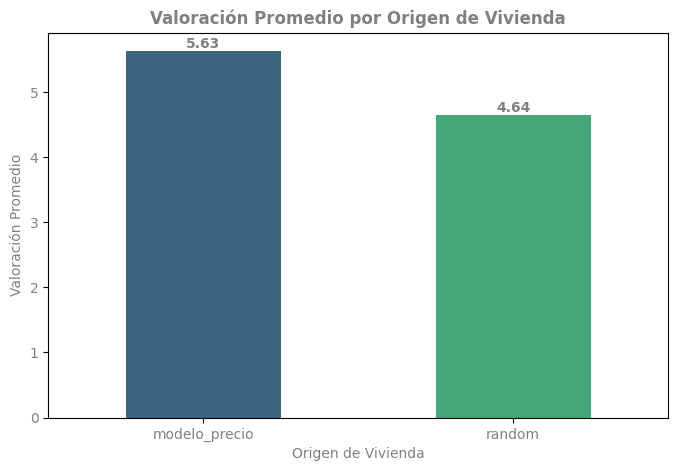

In [33]:
# Calculamos la media de las valoraciones por origen de vivienda

valores = valoracion.groupby('origen_vivienda')['Valoración'].mean()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=valores.index, y=valores.values, palette="viridis", width=0.5)  

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray') 

plt.xlabel('Origen de Vivienda',color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Origen de Vivienda', fontweight='bold',color='gray') 

plt.xticks( color='gray')
plt.yticks(color='gray') 
plt.show()


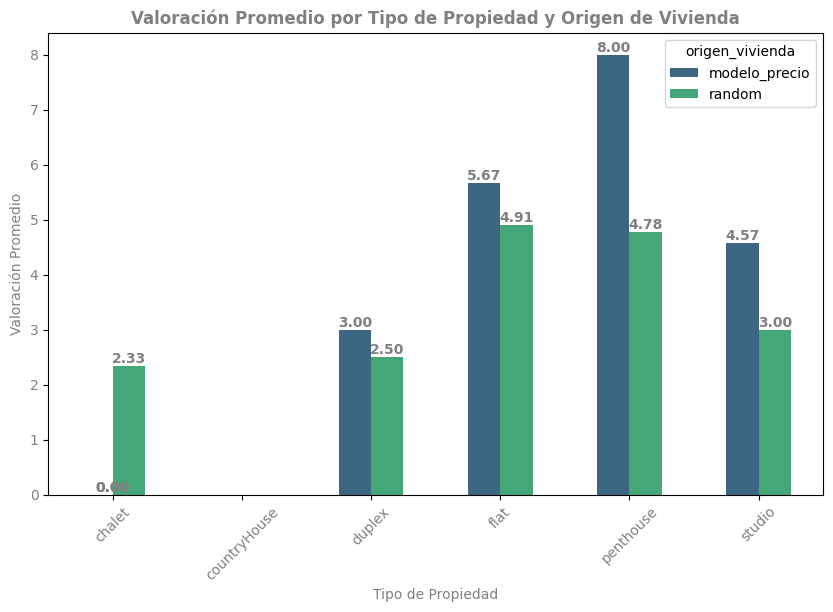

In [34]:
#  Calculamos la media de las valoraciones por tipo de propiedad y origen de vivienda

valores = valoracion.groupby(['propertyType', 'origen_vivienda'])['Valoración'].mean().reset_index()

plt.figure(figsize=(10,6))

ax = sns.barplot(x='propertyType', y='Valoración', hue='origen_vivienda', data=valores, palette="viridis", width=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',   
                (p.get_x() + p.get_width()/2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray') 

plt.xlabel('Tipo de Propiedad', color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Tipo de Propiedad y Origen de Vivienda', fontweight='bold', color='gray')

plt.xticks(rotation=45, color='gray') 
plt.yticks(color='gray')  

plt.show()


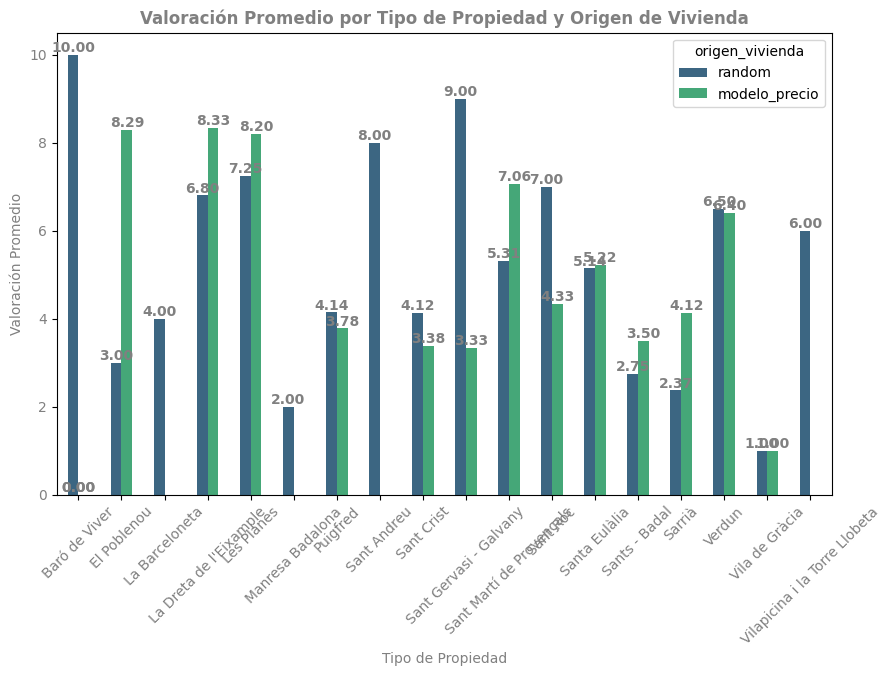

In [35]:
# Calculamos la media de las valoraciones por barrio y origen de vivienda

valores = valoracion.groupby(['barrio', 'origen_vivienda'])['Valoración'].mean().reset_index().dropna(subset='Valoración')

plt.figure(figsize=(10,6))

ax = sns.barplot(x='barrio', y='Valoración', hue='origen_vivienda', data=valores, palette="viridis", width=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray')

plt.xlabel('Tipo de Propiedad', color='gray')
plt.ylabel('Valoración Promedio', color='gray')
plt.title('Valoración Promedio por Tipo de Propiedad y Origen de Vivienda', fontweight='bold', color='gray') 

plt.xticks(rotation=45, color='gray') 
plt.yticks(color='gray') 

plt.show()
